In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt

log_dir = "./logs/labo2"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)


(60000, 28, 28)


In [2]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0
print(x_train_normalized.shape)


(60000, 28, 28)


In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

In [7]:
x_train_nomalized_reshaped = x_train_normalized.reshape(-1, 28, 28, 1)
x_test_normalized_reshaped = x_test_normalized.reshape(-1, 28, 28, 1)
x_train_nomalized_reshaped.shape

(60000, 28, 28, 1)

In [8]:
datagen = ImageDataGenerator(
    rotation_range=180,
    zoom_range=0.5,
    width_shift_range=0.1,
    height_shift_range=0.1
)

datagen.fit(x_train_nomalized_reshaped, seed=42)
augmented_data_gen = datagen.flow(x_train_nomalized_reshaped, y_train_one_hot, batch_size=64, shuffle=False)
augmented_data_gen[0][0][0].shape

(28, 28, 1)

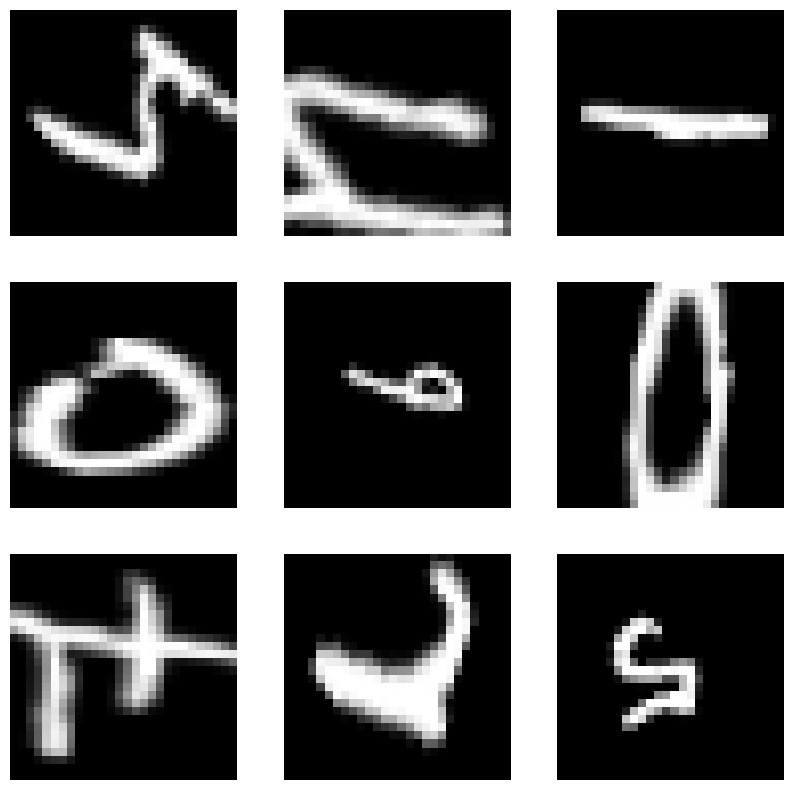

In [9]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    augmented_image = augmented_data_gen.next()[0][0].reshape((28, 28))
    plt.imshow(augmented_image, cmap='gray')
    plt.axis('off')

In [27]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28, 1)), # Geen nood voor meerdere Conv2D lagen, want het is een simpele dataset
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(input_shape=(13, 13, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Model compileren
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# Model samenvatting weergeven
model.summary()
# Model trainen
model.fit(augmented_data_gen, epochs=5, steps_per_epoch=len(x_train_nomalized_reshaped)/64, callbacks=[tensorboard_callback])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 5408)              0         
                                                                 
 dense_18 (Dense)            (None, 128)               692352    
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [29]:
# Model evalueren
test_loss, test_acc = model.evaluate(x_test_normalized,  y_test_one_hot, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - loss: 0.3848 - accuracy: 0.8768 - 1s/epoch - 5ms/step

Test accuracy: 0.876800000667572


313/313 [==============================] - 1s 4ms/step


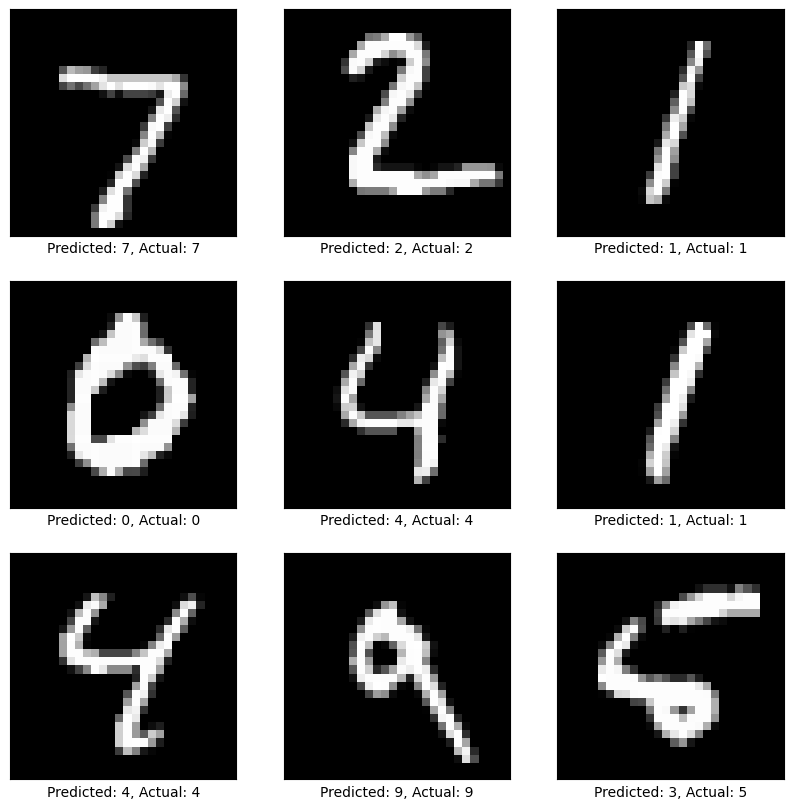

In [39]:
# De eerste 25 test afbeeldingen en hun voorspelde labels weergeven
predictions = model.predict(x_test_normalized_reshaped)
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_normalized[i], cmap='gray')
    plt.xlabel(f"Predicted: {predictions[i].argmax()}, Actual: {y_test[i]}")
plt.show()

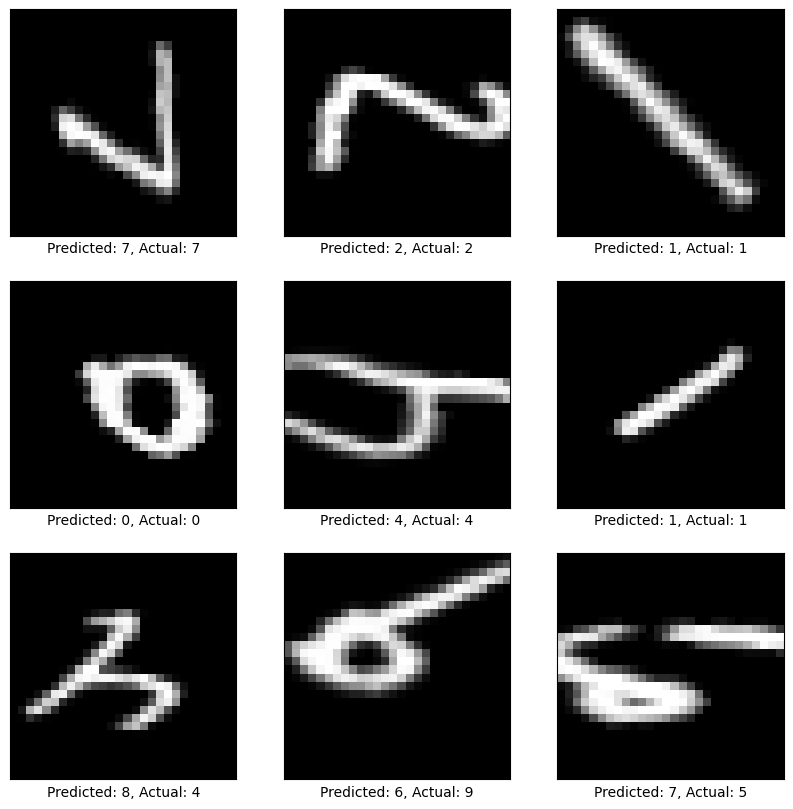

In [64]:
augmented_data_gen_test = datagen.flow(x_test_normalized_reshaped, batch_size=1, shuffle=False)
predictions = model.predict(augmented_data_gen_test)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    augmented_image = augmented_data_gen_test.next()[0].reshape((28, 28))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(augmented_image, cmap='gray')
    plt.xlabel(f"Predicted: {predictions[i].argmax()}, Actual: {y_test[i]}")
plt.show()

In [65]:
# Model samenvatting weergeven
model.summary()
# Model trainen
model.fit(x_train_nomalized_reshaped, y_train_one_hot, epochs=5, steps_per_epoch=len(x_train_nomalized_reshaped)/64, callbacks=[tensorboard_callback])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

313/313 [==============================] - 1s 3ms/step


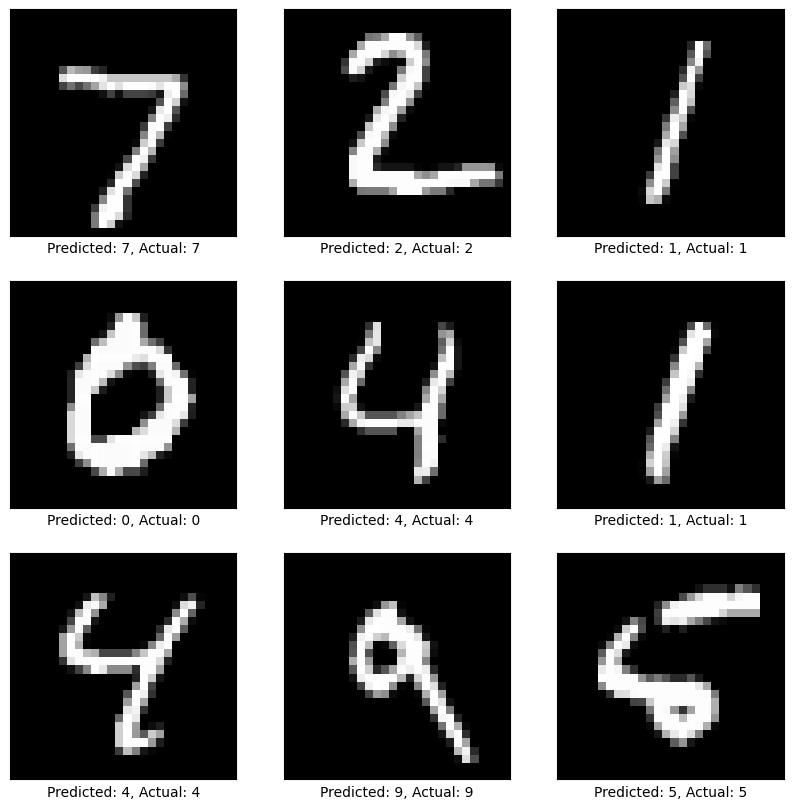

In [66]:
# De eerste 25 test afbeeldingen en hun voorspelde labels weergeven
predictions = model.predict(x_test_normalized_reshaped)
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_normalized[i], cmap='gray')
    plt.xlabel(f"Predicted: {predictions[i].argmax()}, Actual: {y_test[i]}")
plt.show()

10000/10000 [==============================] - 20s 2ms/step


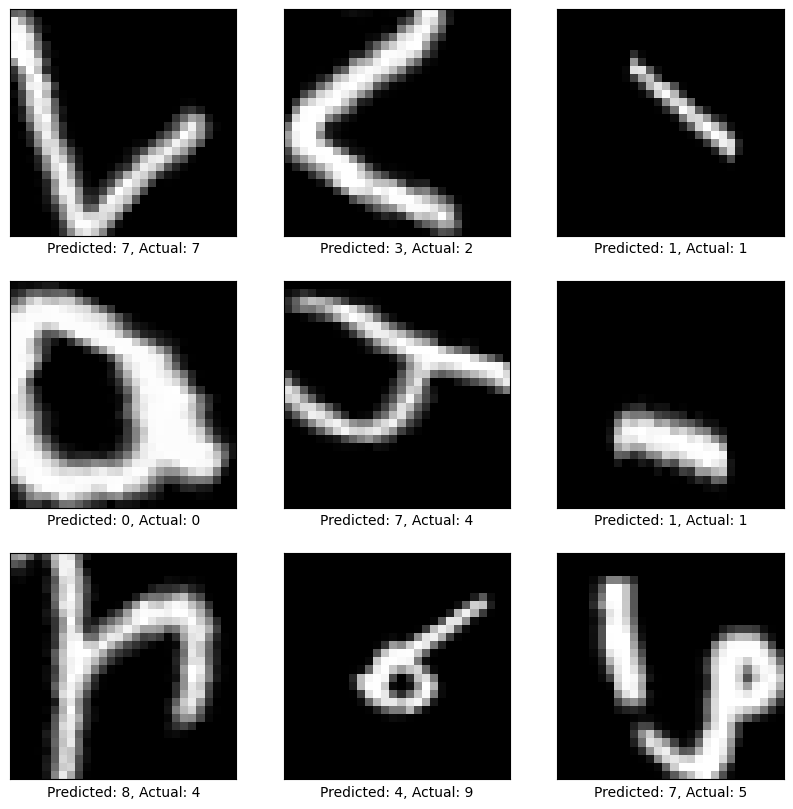

In [67]:
augmented_data_gen_test = datagen.flow(x_test_normalized_reshaped, batch_size=1, shuffle=False)
predictions = model.predict(augmented_data_gen_test)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    augmented_image = augmented_data_gen_test.next()[0].reshape((28, 28))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(augmented_image, cmap='gray')
    plt.xlabel(f"Predicted: {predictions[i].argmax()}, Actual: {y_test[i]}")
plt.show()